# **Proyecto Cálculo Prima del Seguro : Regresión Lineal**

*Nuestra tarea consiste en calcular la prime del seguro usando la Regresión Lineal*



# Inicio

En primer lugar, vamos a importar algunos módulos comunes, asegurarnos de que MatplotLib traza las figuras correctamente y preparar una función para guardar las figuras. También comprobamos que Python 3.5 o posterior está instalado (aunque Python 2.x puede funcionar, está obsoleto por lo que es **altamente** recomendable utilizar Python 3 en su lugar), así como Scikit-Learn ≥0.20.

In [387]:
# Se requiere Python ≥ 3.5
import sys;
assert sys.version_info >= (3, 5);

# Se requiere Scikit-Learn ≥ 0.20
import sklearn;
assert sklearn.__version__ >= "0.20";

# Otros imports
import numpy as np;
import os;

# la línea que sigue, sólo en Colab ...
# %matplotlib inline

import matplotlib as mpl;
import matplotlib.pyplot as plt;

# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=15);
mpl.rc('xtick', labelsize=15);
mpl.rc('ytick', labelsize=15);



# Definimos la función que importará los datos

In [388]:
import pandas as pd

INSURANCE_PATH = os.path.join("datasets", "insurance");

def load_insurance_data(insurance_path):
    csv_path = os.path.join(insurance_path, "insurance.csv")
    print("Leyendo", csv_path)
    return pd.read_csv(csv_path)



## Primer acercamiento a la estructura de los datos

In [389]:
insurance = load_insurance_data(INSURANCE_PATH)
insurance.head()


Leyendo datasets\insurance\insurance.csv


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [390]:

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


# Revisamos los NaN del DataSet


In [391]:
# De forma global
insurance.isna().sum()

age         1
sex         0
bmi         1
children    0
smoker      1
region      0
charges     0
dtype: int64

### Podemos ver como tenemos varios NaN repartidos
* age 1
* bmi 1
* smoker 1

*En el caso de la edad (age), pondremos la media*

In [392]:
# Hallamos la media redondeada a años
media_age = round(insurance["age"].mean(),0)
print("La media redondeada a años es: ", round(insurance["age"].mean(),0))
# Localizamos el índice del NaN
lista_NaN_age = list(insurance.loc[pd.isna(insurance["age"]), :].index)
print("El o los índices con NaN son : ", list(insurance.loc[pd.isna(insurance["age"]), :].index))
# Cambiamos el valor de los índice para la columna añoas por la media
for x in lista_NaN_age:
    insurance.loc[x,'age']=media_age

#Revisamos resultados 
print("NaN en la columna 'age' : ", insurance["age"].isna().sum())


La media redondeada a años es:  39.0
El o los índices con NaN son :  [750]
NaN en la columna 'age' :  0


*En el caso del índice de masa corporal (bmi), pondremos la media*

In [393]:
# Hallamos la media redondeada a tres decimales
media_bmi = round(insurance["bmi"].mean(),3)
print("La media redondeada de índice de masa corporal es: ", round(insurance["bmi"].mean(),3))
# Localizamos el índice del NaN
lista_NaN_bmi = list(insurance.loc[pd.isna(insurance["bmi"]), :].index)
print("El o los índices con NaN son : ", list(insurance.loc[pd.isna(insurance["bmi"]), :].index))
# Cambiamos el valor de los índice para la columna añoas por la media
for x in lista_NaN_bmi:
    insurance.loc[x,'bmi']=media_bmi

#Revisamos resultados 
print("NaN en la columna 'bmi' : ", insurance["bmi"].isna().sum())

La media redondeada de índice de masa corporal es:  30.665
El o los índices con NaN son :  [1337]
NaN en la columna 'bmi' :  0


*En el caso de fumador/no fumador, miraremos cual es la opción mayoritaria y pondremos esa en el caso concreto de NaN*

In [394]:
# Revisaremos las dos opciones, y las contaremos
print("El número de valores de fumadores y no fumadores es :\n", insurance["smoker"].value_counts())
# Vemos que la opción mayoritaria es NO fumador, por lo que cambiaremos el NaN por un "no"
# Localizamos el índice del NaN
lista_NaN_smoker = list(insurance.loc[pd.isna(insurance["smoker"]), :].index)
print("El o los índices con NaN son : ", list(insurance.loc[pd.isna(insurance["smoker"]), :].index))
# Cambiamos el valor de los índice para la columna añoas por la media
for x in lista_NaN_smoker:
    insurance.loc[x,'smoker']="no"

#Revisamos resultados 
print("NaN en la columna 'smoker' : ", insurance["smoker"].isna().sum())


El número de valores de fumadores y no fumadores es :
 no     1063
yes     274
Name: smoker, dtype: int64
El o los índices con NaN son :  [681]
NaN en la columna 'smoker' :  0


In [395]:
# Revisamos de nuevo los NaN de forma global
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Podemos observar tres columnas categarizadas : Sex, Smoker y Region


### Sex

In [396]:
# agregamos la columna a una variable
cat_sexo = insurance[ ["sex"] ]

# Revisamos el contenido de la columna
insurance["sex"].value_counts()


male      676
female    662
Name: sex, dtype: int64

### Smoker

In [397]:
# agregamos la columna a una variable
cat_fumador = insurance[ ["smoker"] ]

# Revisamos el contenido de la columna
insurance["smoker"].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

### Region

In [398]:
# agregamos la columna a una variable
cat_region = insurance[ ["region"] ]

# Revisamos el contenido de la columna
insurance["region"].value_counts()



southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### HAremos una copia para NO trabajar sobre el original

In [399]:
# Haremos una copia para ver los resultados 
insurance_copy = insurance.copy()

## Llamamos al método OneHotEncoder
*Usaremos OneHotEncoder para normalizar las columnas categorizadas de: Sex, Smoker y Region, y crear nuevas columnas con valores 0 y 1, para no agregar información al dataset y poder seguir categorizando*

In [400]:
from sklearn.preprocessing import OneHotEncoder

### *Usamos el método con cada una de las columnas categóricas, empezando por*


# SEXO

In [401]:
sexo_encoder =OneHotEncoder(sparse=False)
# para la categoria Sexo (male/female)
sexo_cat_1hot = sexo_encoder.fit_transform(cat_sexo)

sexo_cat_1hot

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [402]:
# Aquí tendremos los nombre de las categorías
sexo_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [403]:

# Ahora sustituiremos la columna Sexo , por las de OneHotEncoder
insurance_copy.reset_index(drop=False, inplace=True)
insurance_copy=insurance_copy.join(pd.DataFrame(sexo_cat_1hot, columns=[cat for cat in sexo_encoder.categories_[0]]))
insurance_copy=insurance_copy.drop(["sex"], axis=1)
# Mostramos el resultado
insurance_copy.info()
insurance_copy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   female    1338 non-null   float64
 8   male      1338 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 94.2+ KB


,index,age,bmi,children,smoker,region,charges,female,male
0,0,19.0,27.900,0,yes,southwest,16884.92400,1.0,0.0
1,1,18.0,33.770,1,no,southeast,1725.55230,0.0,1.0
2,2,28.0,33.000,3,no,southeast,4449.46200,0.0,1.0
3,3,33.0,22.705,0,no,northwest,21984.47061,0.0,1.0
4,4,32.0,28.880,0,no,northwest,3866.85520,0.0,1.0


# Fumador

In [404]:
fumador_encoder = OneHotEncoder(sparse=False)
# para la categoria Fumador (no/yes)
fumador_cat_1hot = fumador_encoder.fit_transform(cat_fumador)

insurance_copy.reset_index(drop=False, inplace=True)
insurance_copy=insurance_copy.join(pd.DataFrame(fumador_cat_1hot, columns=[cat for cat in fumador_encoder.categories_[0]]))
insurance_copy=insurance_copy.drop(["smoker","index","level_0"], axis=1)

# Mostramos el resultado
insurance_copy.info()
insurance_copy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   region    1338 non-null   object 
 4   charges   1338 non-null   float64
 5   female    1338 non-null   float64
 6   male      1338 non-null   float64
 7   no        1338 non-null   float64
 8   yes       1338 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 94.2+ KB


,age,bmi,children,region,charges,female,male,no,yes
0,19.0,27.900,0,southwest,16884.92400,1.0,0.0,0.0,1.0
1,18.0,33.770,1,southeast,1725.55230,0.0,1.0,1.0,0.0
2,28.0,33.000,3,southeast,4449.46200,0.0,1.0,1.0,0.0
3,33.0,22.705,0,northwest,21984.47061,0.0,1.0,1.0,0.0
4,32.0,28.880,0,northwest,3866.85520,0.0,1.0,1.0,0.0


In [405]:
# Cambiamos el nombre d elas columnas para entenderlo mejor
insurance_copy=insurance_copy.rename(columns={"no":"no smoker"});
insurance_copy=insurance_copy.rename(columns={"yes":"smoker"});

# Revisamos cambios 
insurance_copy.head()

,age,bmi,children,region,charges,female,male,no smoker,smoker
0,19.0,27.900,0,southwest,16884.92400,1.0,0.0,0.0,1.0
1,18.0,33.770,1,southeast,1725.55230,0.0,1.0,1.0,0.0
2,28.0,33.000,3,southeast,4449.46200,0.0,1.0,1.0,0.0
3,33.0,22.705,0,northwest,21984.47061,0.0,1.0,1.0,0.0
4,32.0,28.880,0,northwest,3866.85520,0.0,1.0,1.0,0.0


In [406]:
# para la categoria Region (southeast/southwest/northwest/northeast)
region_encoder = OneHotEncoder(sparse=False) 
region_cat_1hot = region_encoder.fit_transform(cat_region)

insurance_copy.reset_index(drop=False, inplace=True)
insurance_copy=insurance_copy.join(pd.DataFrame(region_cat_1hot, columns=[cat for cat in region_encoder.categories_[0]]))
insurance_copy=insurance_copy.drop(["region","index"], axis=1)

# Mostramos el resultado
insurance_copy.info()
insurance_copy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   float64
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   charges    1338 non-null   float64
 4   female     1338 non-null   float64
 5   male       1338 non-null   float64
 6   no smoker  1338 non-null   float64
 7   smoker     1338 non-null   float64
 8   northeast  1338 non-null   float64
 9   northwest  1338 non-null   float64
 10  southeast  1338 non-null   float64
 11  southwest  1338 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 125.6 KB


,age,bmi,children,charges,female,male,no smoker,smoker,northeast,northwest,southeast,southwest
0,19.0,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


### Copiamos los resultados a una variable normalizada original

In [407]:
insurance_norm = insurance_copy

In [408]:
insurance_norm.describe()

,age,bmi,children,charges,female,male,no smoker,smoker,northeast,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.208520,30.664589,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049832,6.098031,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


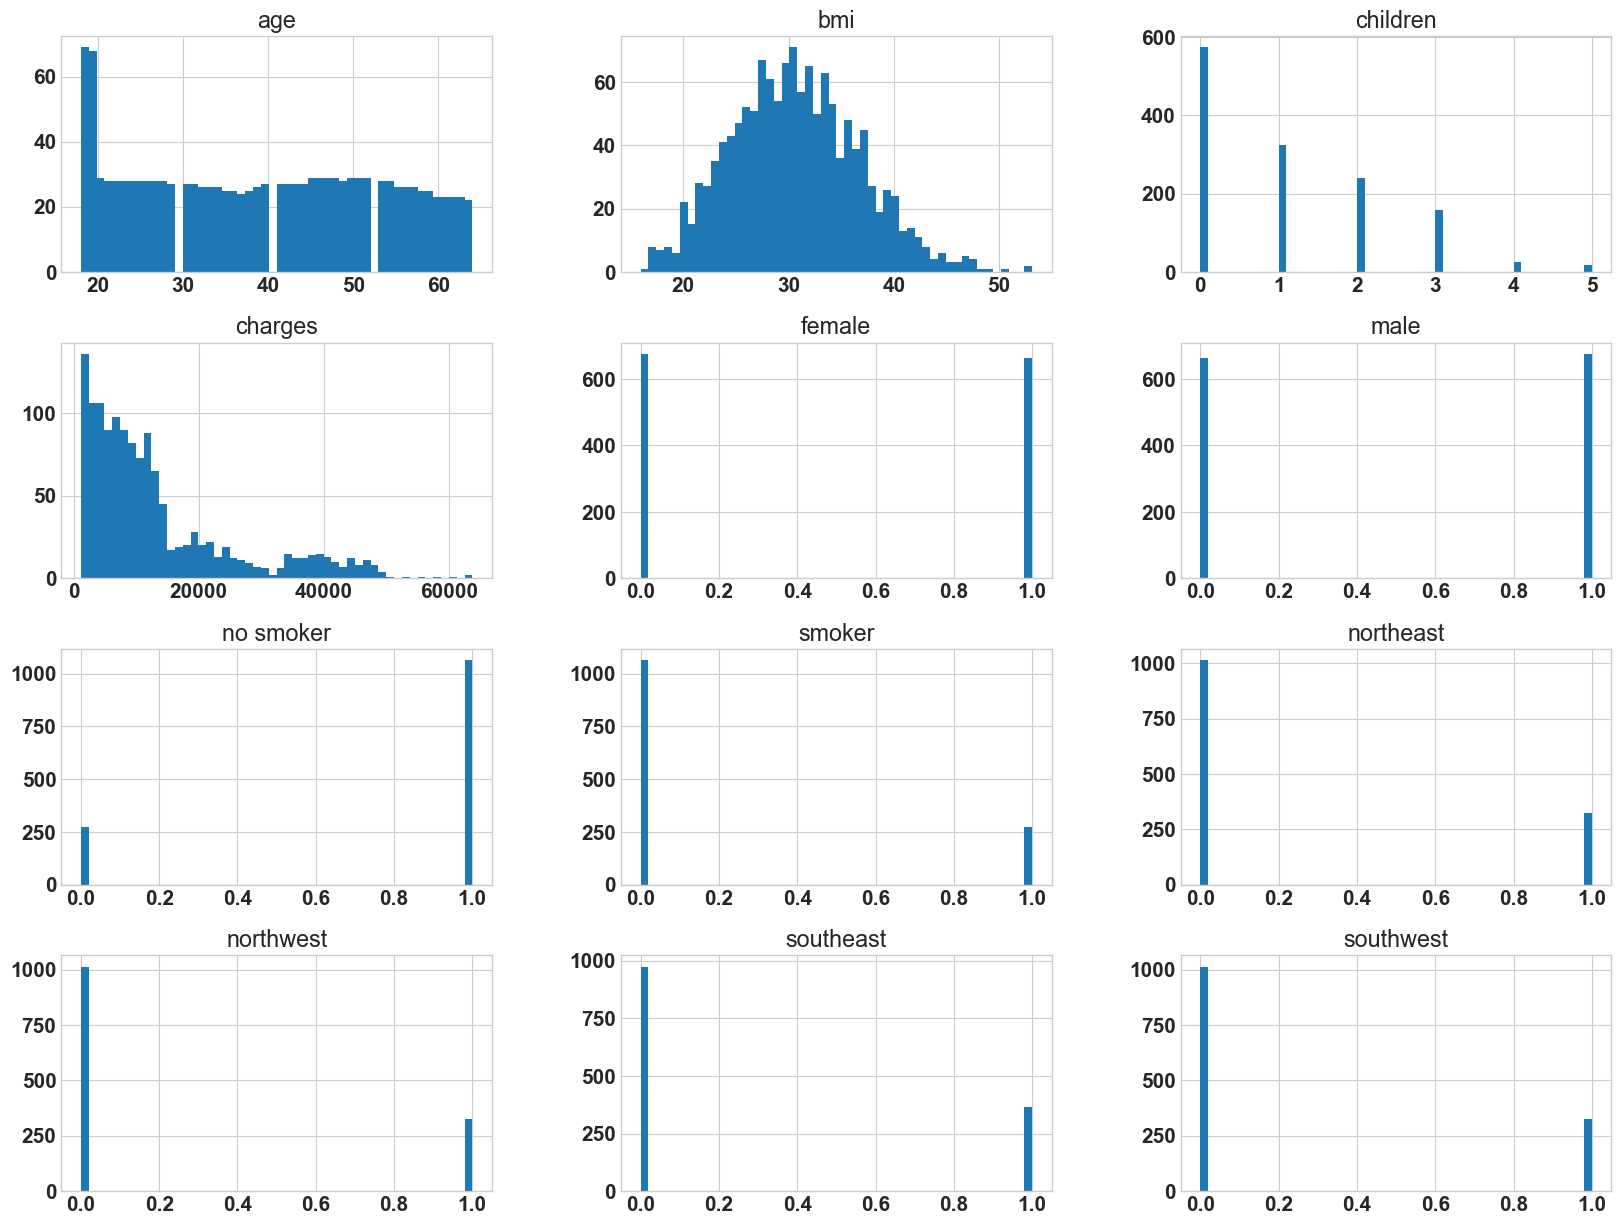

In [409]:
insurance_norm.hist(bins=50, figsize =(20,15))
plt.show()

# Descubrir y visualizar los datos para obtener información

---



## Buscando correlaciones

In [410]:
corr_matrix = insurance_norm.corr()
corr_matrix

,age,bmi,children,charges,female,male,no smoker,smoker,northeast,northwest,southeast,southwest
age,1.000000,0.109505,0.042373,0.299066,0.020964,-0.020964,0.024809,-0.024809,0.002415,-0.000468,-0.011468,0.009956
bmi,0.109505,1.000000,0.012582,0.198602,-0.046175,0.046175,-0.004136,0.004136,-0.138270,-0.135654,0.269912,-0.006316
children,0.042373,0.012582,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299066,0.198602,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
female,0.020964,-0.046175,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
male,-0.020964,0.046175,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
no smoker,0.024809,-0.004136,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker,-0.024809,0.004136,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
northeast,0.002415,-0.138270,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000468,-0.135654,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


In [411]:
corr_matrix["charges"].sort_values(ascending=False)

charges      1.000000
smoker       0.787251
age          0.299066
bmi          0.198602
southeast    0.073982
children     0.067998
male         0.057292
northeast    0.006349
northwest   -0.039905
southwest   -0.043210
female      -0.057292
no smoker   -0.787251
Name: charges, dtype: float64

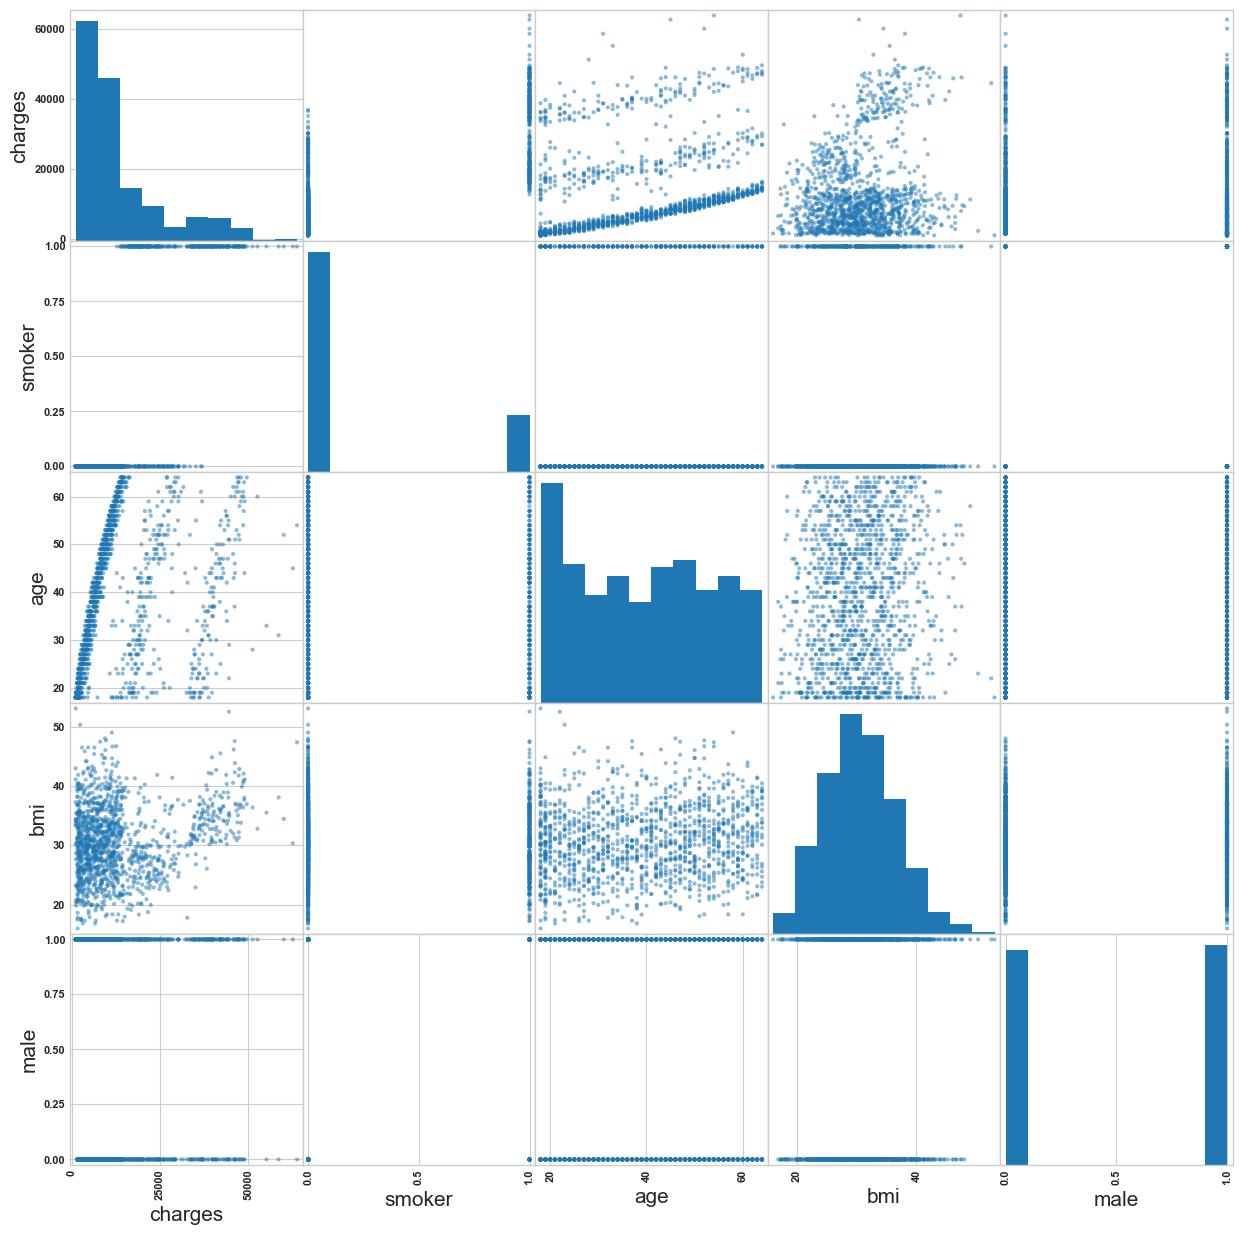

In [412]:
from pandas.plotting import scatter_matrix;

attributes = ["charges","smoker", "age", "bmi", "male"]

scatter_matrix(insurance_norm[attributes], figsize=(15,15) );

---

## Comprobamos la relación entre EDAD y Prima del seguro, con una división de color entre fumadores y no fumadores

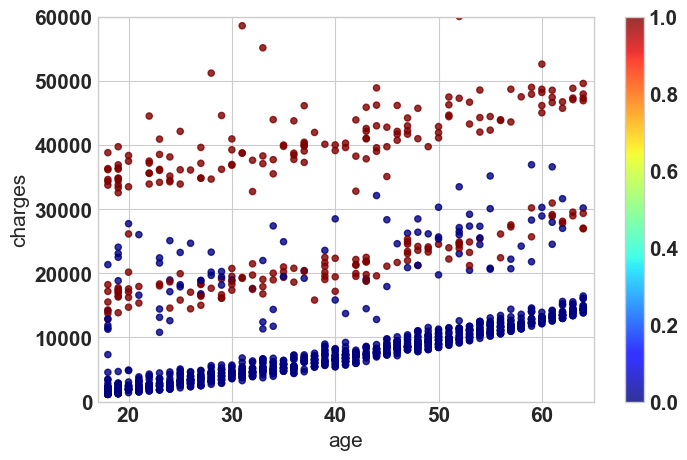

In [413]:

insurance_norm.plot(kind="scatter", 
             x= "age",
             y = "charges",
             c=insurance_norm["smoker"],
             cmap = plt.get_cmap("jet"),
             alpha=0.8)

plt.axis([17,65,0,60000]);

#### Podemos observar que existe una relación lineal positiva entre el precio de la prima del seguro y la edad.

#### En mayor medida entre los que fuman, llegando a pagar el doble e incluso el triple

---

## Comprobamos la relación entre BMI(Índice de masa corporal) y Prima del seguro, con una división de color entre fumadores y no fumadores

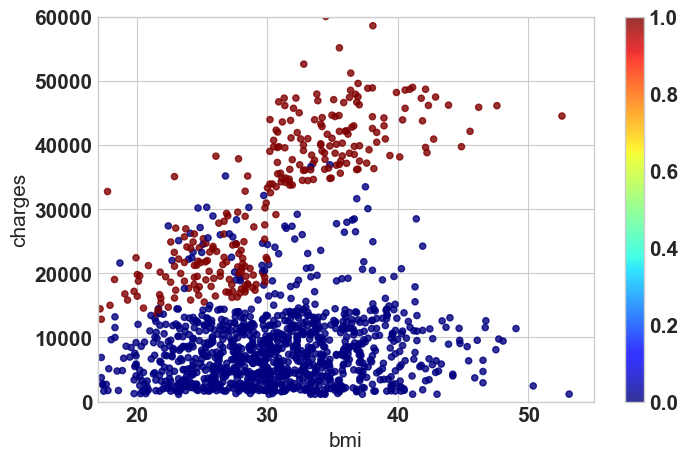

In [414]:

insurance_norm.plot(kind="scatter", 
             x= "bmi",
             y = "charges",
             c=insurance_norm["smoker"],
             cmap = plt.get_cmap("jet"),
             alpha=0.8)

plt.axis([17,55,0,60000]);

#### Podemos observar que existe una relación lineal positiva entre el precio de la prima del seguro y en mayor medida entre los que fuman, llegando a pagar el doble e incluso el triple
---

### Agregamos una nueva columna separando los que tengan más y menos de 30 de BMI

In [416]:

insurance['BMI_below_30'] = np.where(insurance['bmi']<30,'yes', 'no') 


### Aplicamos un filtro de fumadores y no fumadores 

In [430]:
# Filtramos los fumadores
filter_smoker = insurance[(insurance['smoker']=='yes')]
filter_no_smoker = insurance[(insurance['smoker']=='no')]

filter_smoker_norm = insurance_norm[(insurance_norm['smoker']==1)]
filter_no_smoker_norm = insurance_norm[(insurance_norm['smoker']==0)]



### Ahora normalizamos esta nueva columna

In [417]:
insurance_norm['BMI_below_30'] = np.where(insurance['bmi']<30, 1, 0) 

## Ahora estudiamos los resultados con un filtro de los fumadores la relación entre la edad y Prima del seguro

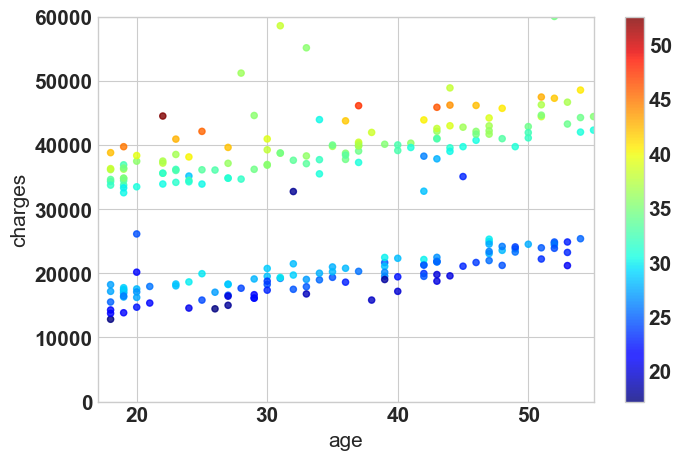

In [418]:
filter_smoker_norm.plot(kind="scatter", 
             x= "age",
             y = "charges",
             c=filter_smoker_norm["bmi"],
             cmap = plt.get_cmap("jet"),
             alpha=0.8)

plt.axis([17,55,0,60000]);

#### Podemos observar que existe una relación lineal positiva entre la edad y el precio de la prima del seguro dividido entre los que tienenun BMI inferior a 30 y los mayores de 30, los cuales llegan a pagar , con la misma edad hasta el doble en su primadel seguro
---

## Ahora estudiamos los resultados con un filtro de los fumadores la relación entre el BMI(Índice de masa corporal) y Prima del seguro

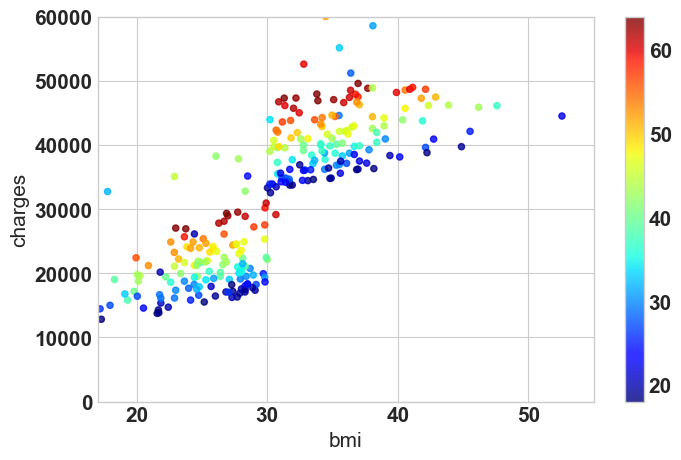

In [419]:
filter_smoker_norm.plot(kind="scatter", 
             x= "bmi",
             y = "charges",
             c=filter_smoker_norm["age"],
             cmap = plt.get_cmap("jet"),
             alpha=0.8)

plt.axis([17,55,0,60000]);

#### Podemos observar ahora claramente el salto comentado en el punto anterior a partir del índice 30 en el BMI, independientemente de la edad.
---

## Aplicamo un filtro sobre la masa corporal BMI <30 y >30

In [420]:
# Filtramos los fumadores
below30_bmi = filter_smoker[(filter_smoker['bmi']<30)]
upper30_bmi = filter_smoker[(filter_smoker['bmi']>=30)]

below30_bmi_norm = filter_smoker_norm[(filter_smoker_norm['bmi']<30)]
upper30_bmi_norm = filter_smoker_norm[(filter_smoker_norm['bmi']>=30)]

---
## Ahora comprobaremos simultaneamente la relación entre la BMI y Prima del seguro, entre fumadore y no fumadores

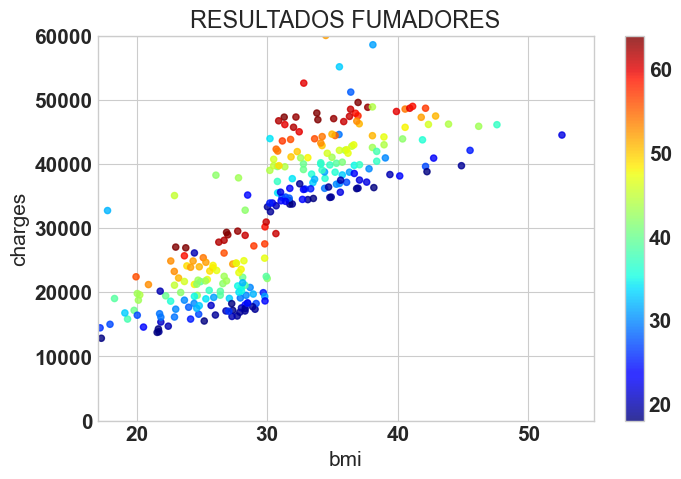

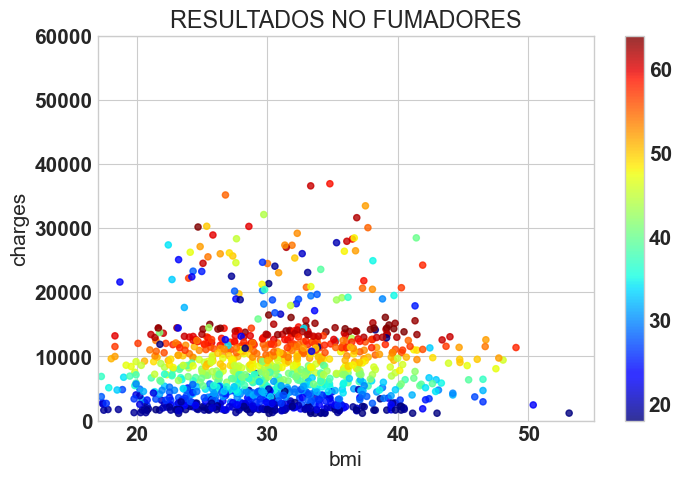

In [421]:
filter_smoker_norm.plot(kind="scatter", 
             title = "RESULTADOS FUMADORES",
             x= "bmi",
             y = "charges",
             c=filter_smoker_norm["age"],
             cmap = plt.get_cmap("jet"),
             alpha=0.8)
plt.axis([17,55,0,60000]);

filter_no_smoker_norm.plot(kind="scatter", 
             title = "RESULTADOS NO FUMADORES",
             x= "bmi",
             y = "charges",
             c=filter_no_smoker_norm["age"],
             cmap = plt.get_cmap("jet"),
             alpha=0.8)
plt.axis([17,55,0,60000]);

#### Podemos observar claramente que la edad juega un factor muy importante, y que la diferencia entre fumadores y no fumadores es muy grande.

#### También que la condición de estar por encima de un índice de bmi superior a 30, dispara la correlación lineal entre BMI y prima para los Fumadores
---

## Ahora comprobaremos simultaneamente la relación entre la Edad y Prima del seguro, entre fumadores y no fumadores

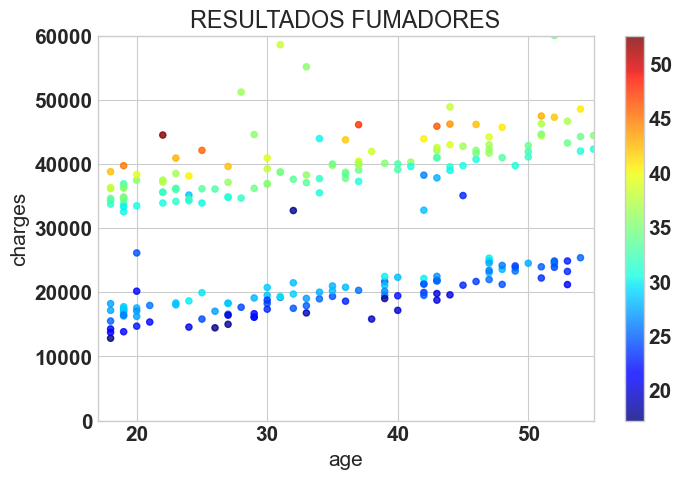

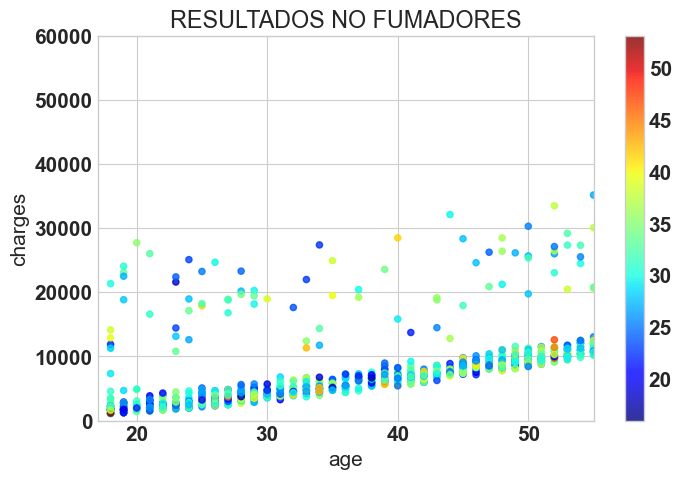

In [422]:
filter_smoker_norm.plot(kind="scatter", 
             title = "RESULTADOS FUMADORES",
             x= "age",
             y = "charges",
             c=filter_smoker_norm["bmi"],
             cmap = plt.get_cmap("jet"),
             alpha=0.8)
plt.axis([17,55,0,60000]);

filter_no_smoker_norm.plot(kind="scatter", 
             title = "RESULTADOS NO FUMADORES",
             x= "age",
             y = "charges",
             c=filter_no_smoker_norm["bmi"],
             cmap = plt.get_cmap("jet"),
             alpha=0.8)
plt.axis([17,55,0,60000]);

---
## Comparación final entre las tres tendencias lineales diferenciadas, en comparación con la absoluta sin filtrar

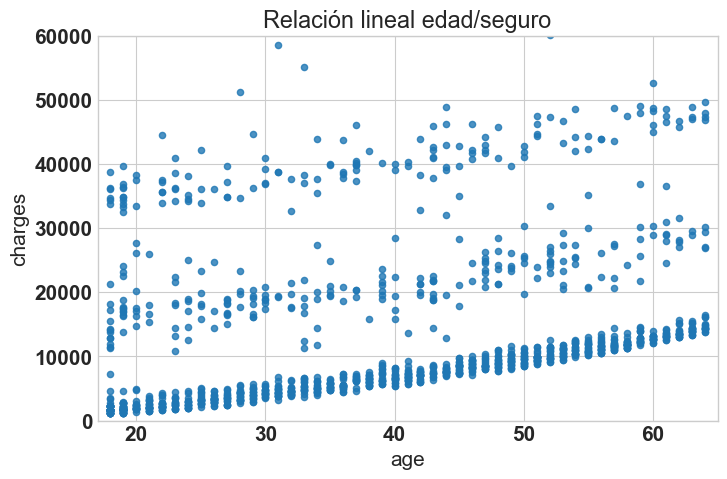

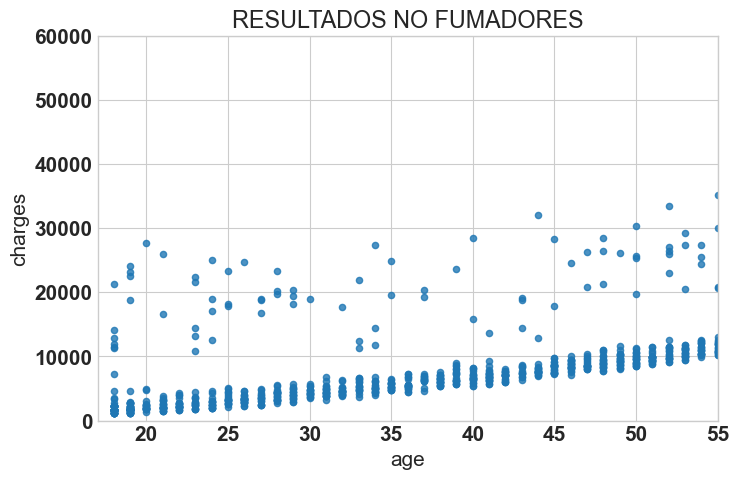

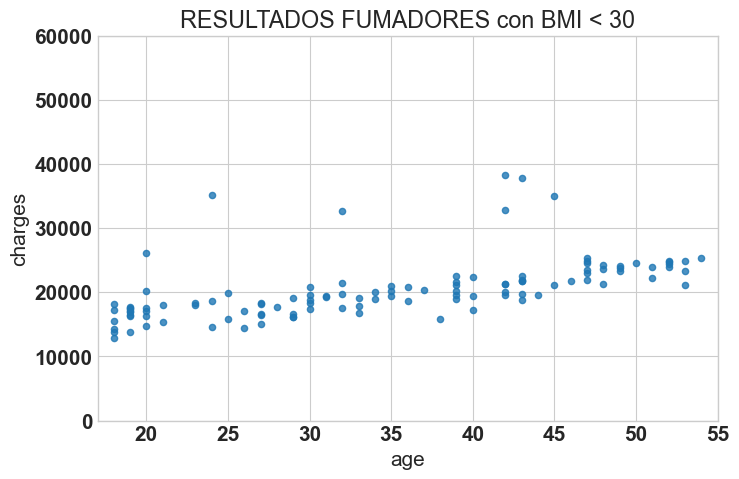

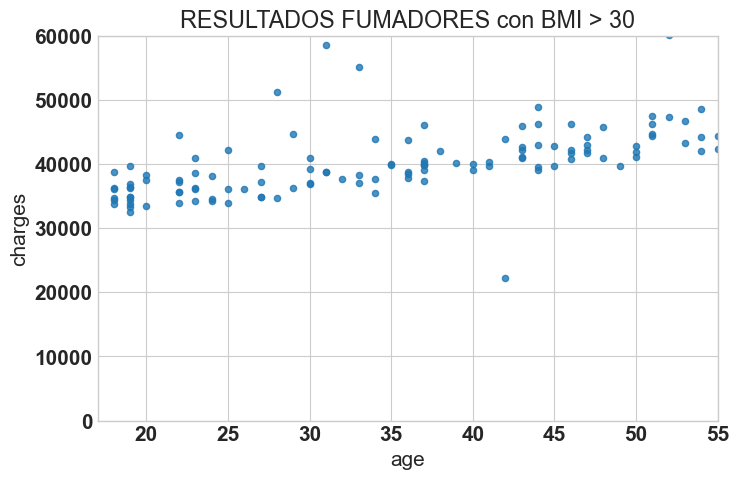

In [423]:
insurance_norm.plot(kind="scatter", 
             title = "Relación lineal edad/seguro",
             x= "age",
             y = "charges",
             alpha=0.8)

plt.axis([17,65,0,60000]);

filter_no_smoker_norm.plot(kind="scatter", 
             title = "RESULTADOS NO FUMADORES",
             x= "age",
             y = "charges",
             alpha=0.8)
plt.axis([17,55,0,60000]);

below30_bmi_norm.plot(kind="scatter", 
             title = "RESULTADOS FUMADORES con BMI < 30",
             x= "age",
             y = "charges",
             alpha=0.8)
plt.axis([17,55,0,60000]);

upper30_bmi_norm.plot(kind="scatter", 
             title = "RESULTADOS FUMADORES con BMI > 30",
             x= "age",
             y = "charges",
             alpha=0.8)
plt.axis([17,55,0,60000]);

---

---

---



In [424]:
import seaborn as sns #Visualization

In [425]:


plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

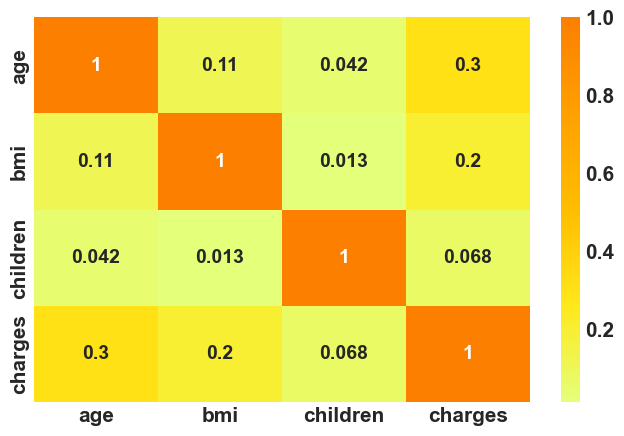

In [426]:
corr = insurance.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

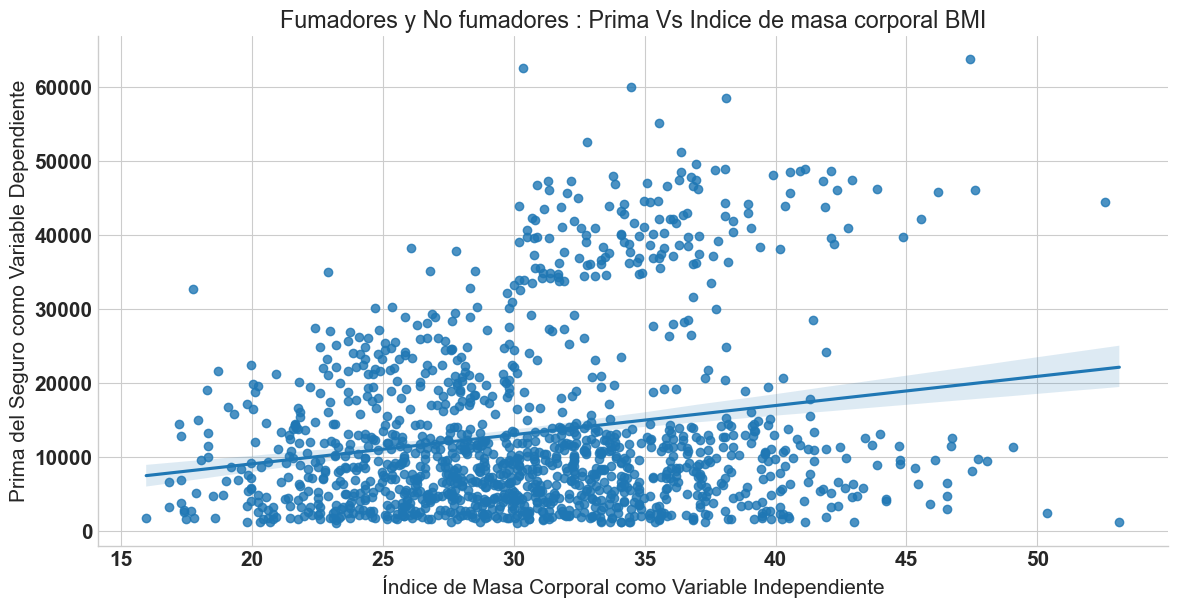

In [427]:
sns.lmplot(x='bmi',y='charges',data=insurance,aspect=2,height=6)
plt.xlabel('Índice de Masa Corporal como Variable Independiente')
plt.ylabel('Prima del Seguro como Variable Dependiente')
plt.title('Fumadores y No fumadores : Prima Vs Indice de masa corporal BMI');


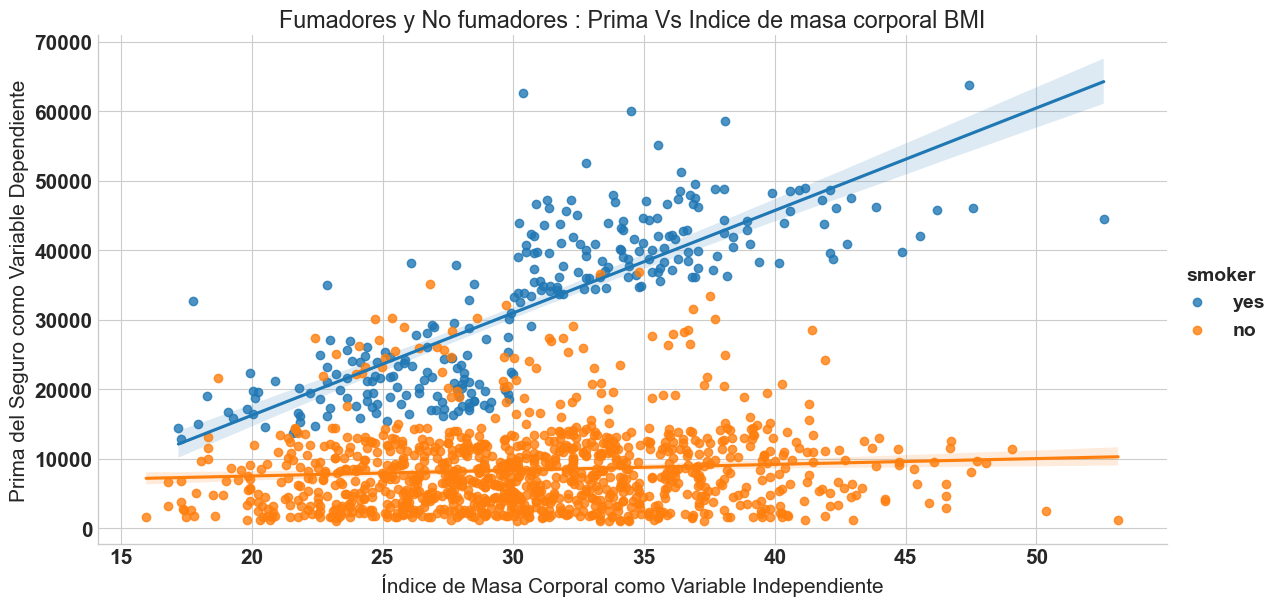

In [428]:

sns.lmplot(x='bmi',y='charges',hue='smoker',data=insurance,aspect=2,height=6)
plt.xlabel('Índice de Masa Corporal como Variable Independiente')
plt.ylabel('Prima del Seguro como Variable Dependiente')
plt.title('Fumadores y No fumadores : Prima Vs Indice de masa corporal BMI');

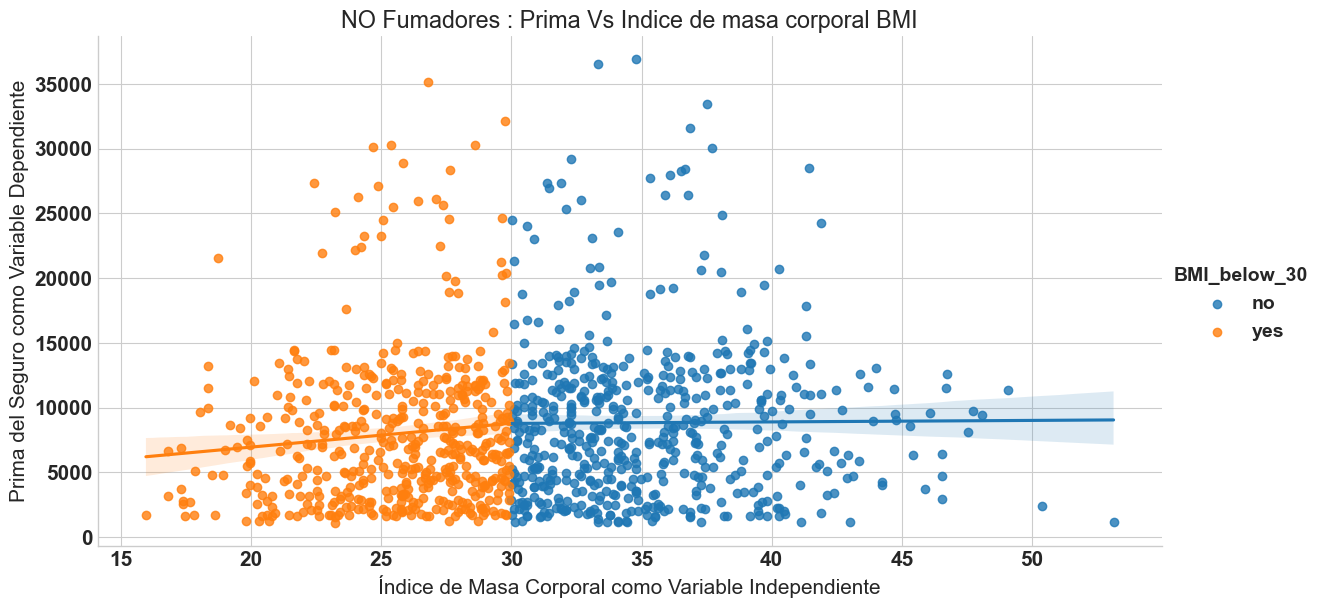

In [431]:
sns.lmplot(x='bmi',y='charges',hue='BMI_below_30',data=filter_no_smoker,aspect=2,height=6)
plt.xlabel('Índice de Masa Corporal como Variable Independiente')
plt.ylabel('Prima del Seguro como Variable Dependiente')
plt.title('NO Fumadores : Prima Vs Indice de masa corporal BMI');

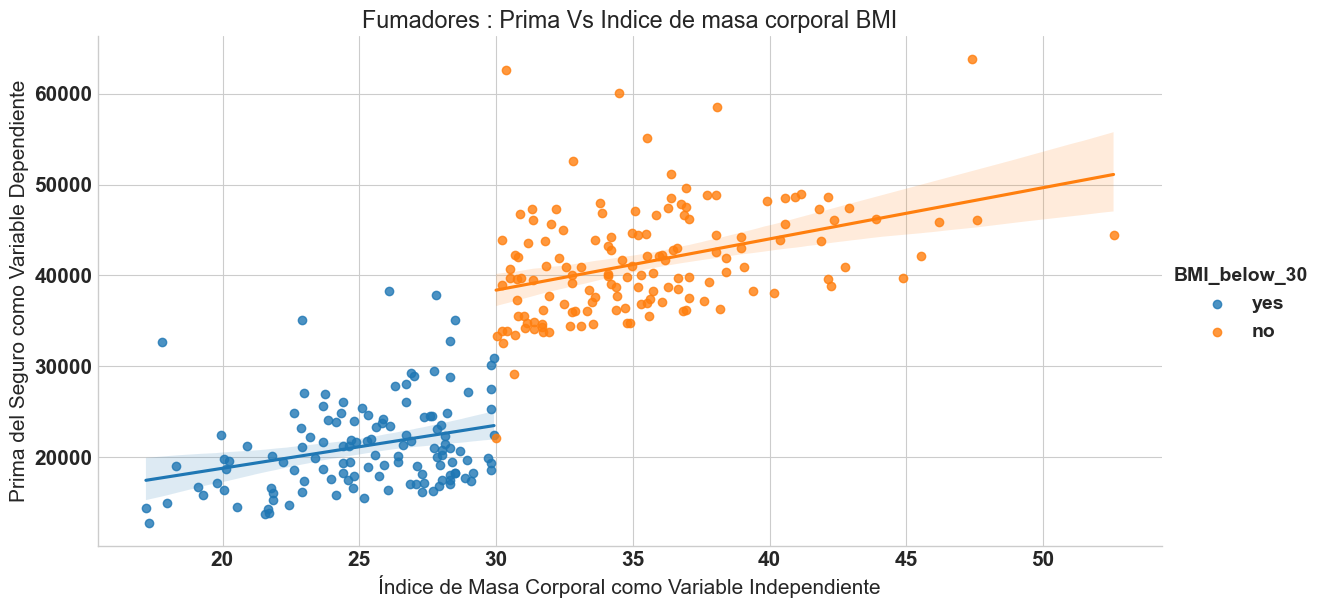

In [432]:
sns.lmplot(x='bmi',y='charges',hue='BMI_below_30', data=filter_smoker,aspect=2,height=6)
plt.xlabel('Índice de Masa Corporal como Variable Independiente')
plt.ylabel('Prima del Seguro como Variable Dependiente')
plt.title('Fumadores : Prima Vs Indice de masa corporal BMI');

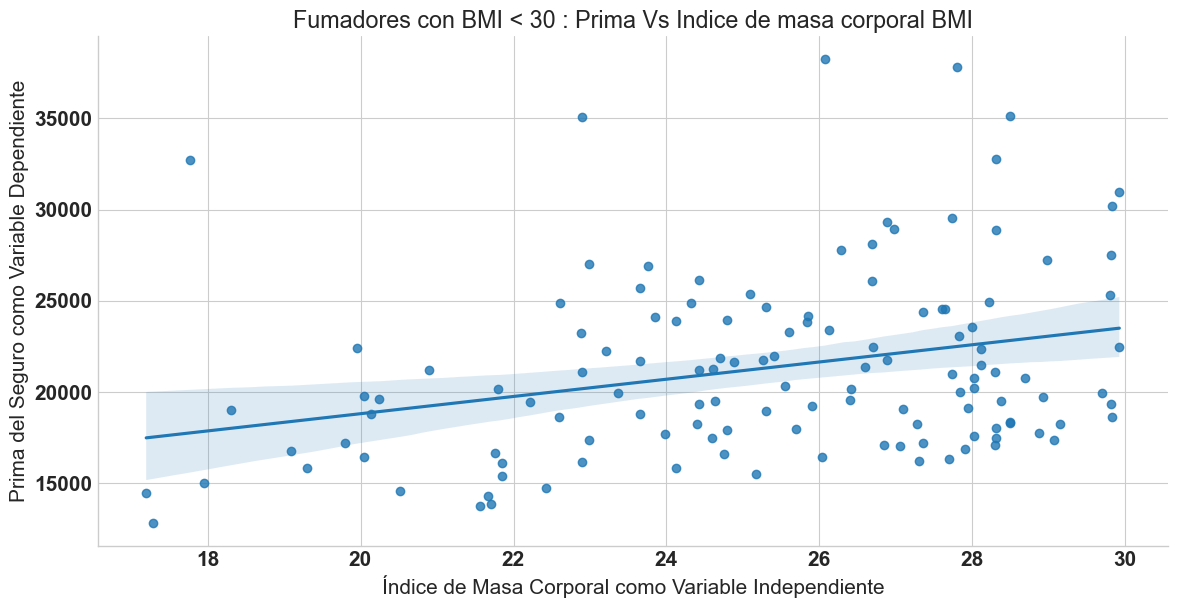

In [433]:
sns.lmplot(x='bmi',y='charges',data=below30_bmi,aspect=2,height=6)
plt.xlabel('Índice de Masa Corporal como Variable Independiente')
plt.ylabel('Prima del Seguro como Variable Dependiente')
plt.title('Fumadores con BMI < 30 : Prima Vs Indice de masa corporal BMI');

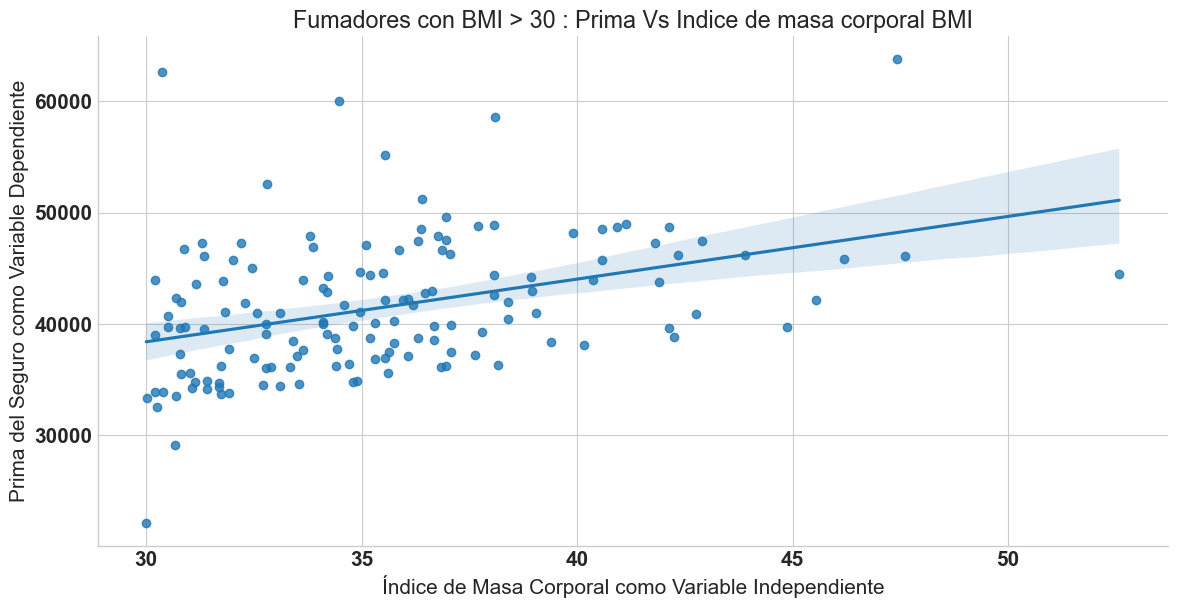

In [434]:
sns.lmplot(x='bmi',y='charges',data=upper30_bmi,aspect=2,height=6)
plt.xlabel('Índice de Masa Corporal como Variable Independiente')
plt.ylabel('Prima del Seguro como Variable Dependiente')
plt.title('Fumadores con BMI > 30 : Prima Vs Indice de masa corporal BMI');

---

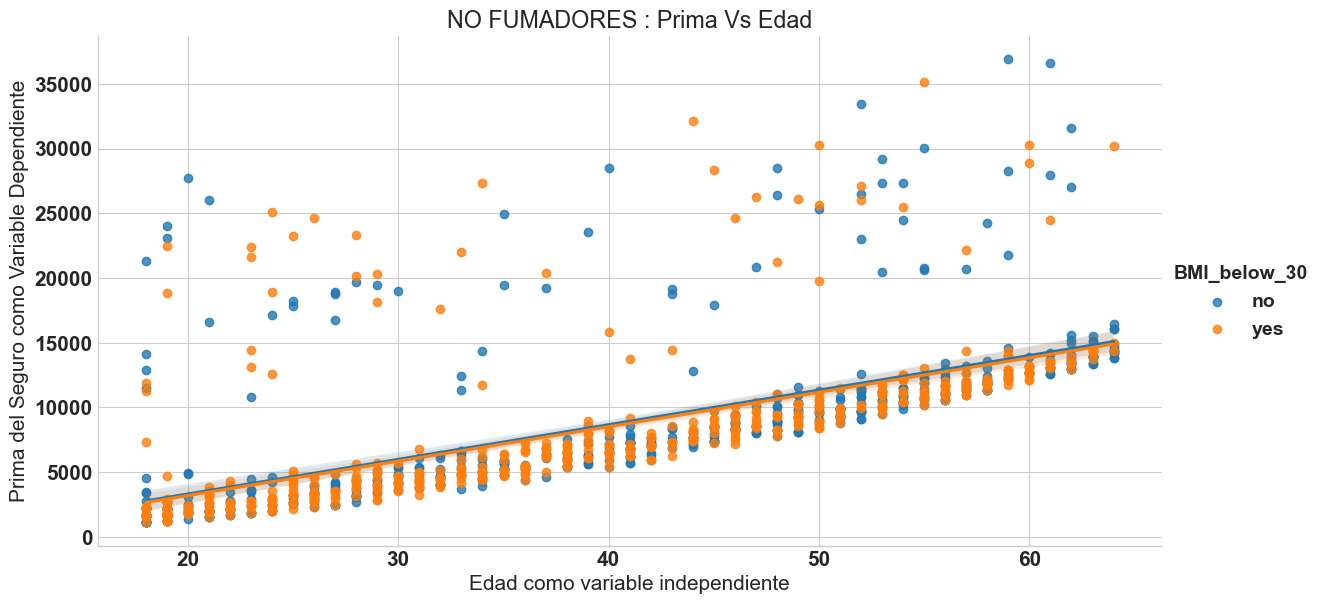

In [435]:
sns.lmplot(x='age',y='charges',hue='BMI_below_30',data=filter_no_smoker,aspect=2,height=6)
plt.xlabel('Edad como variable independiente')
plt.ylabel('Prima del Seguro como Variable Dependiente')
plt.title('NO FUMADORES : Prima Vs Edad');

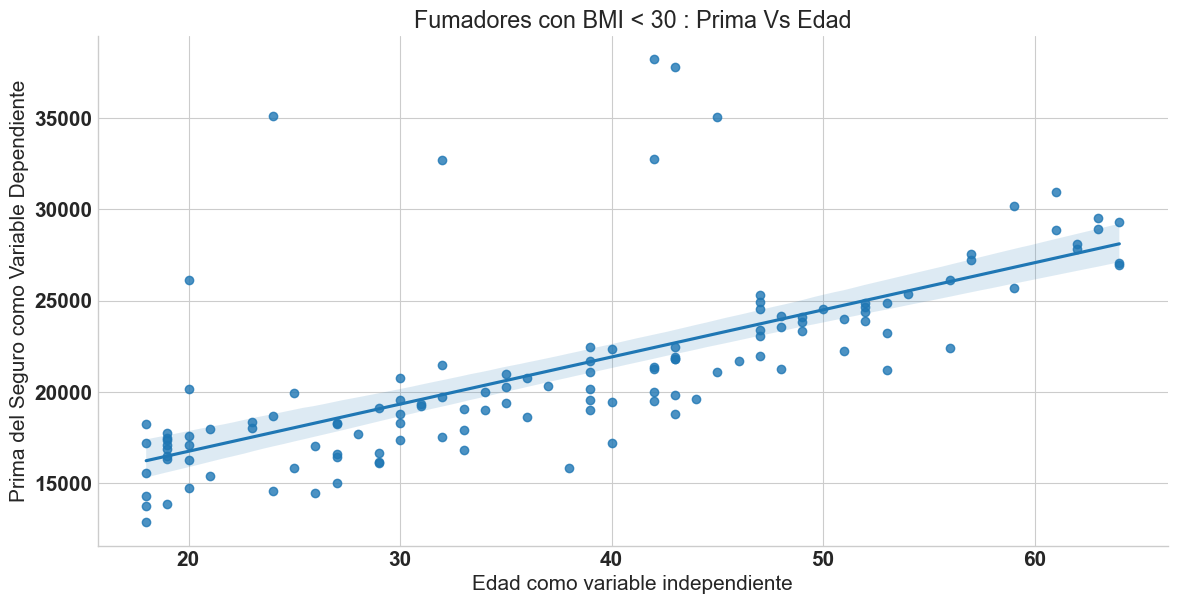

In [436]:
sns.lmplot(x='age',y='charges',data=below30_bmi,aspect=2,height=6)
plt.xlabel('Edad como variable independiente')
plt.ylabel('Prima del Seguro como Variable Dependiente')
plt.title('Fumadores con BMI < 30 : Prima Vs Edad');

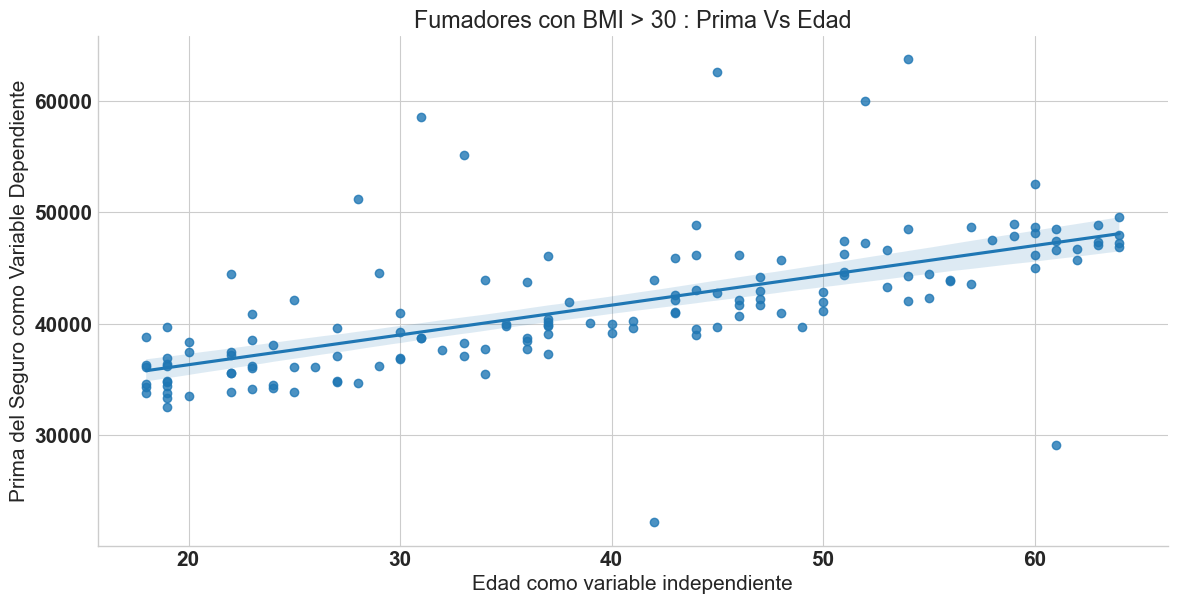

In [437]:
sns.lmplot(x='age',y='charges',data=upper30_bmi,aspect=2,height=6)
plt.xlabel('Edad como variable independiente')
plt.ylabel('Prima del Seguro como Variable Dependiente')
plt.title('Fumadores con BMI > 30 : Prima Vs Edad');

c:\Users\ruben\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ruben\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


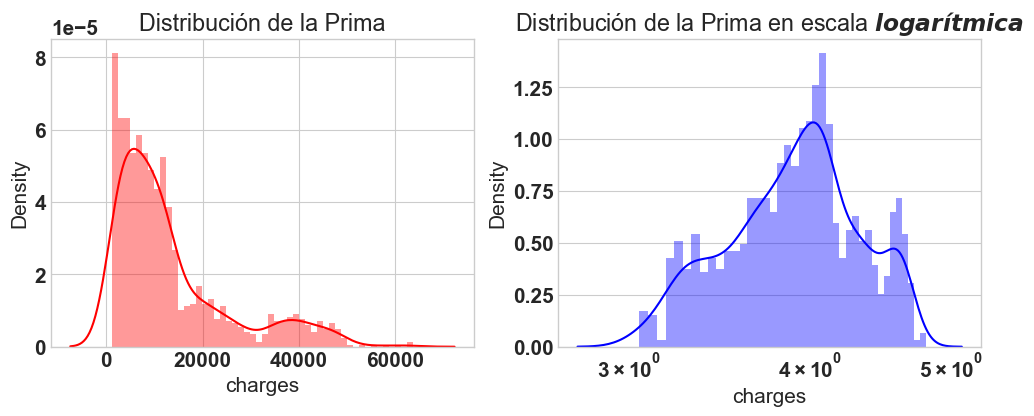

In [442]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(insurance['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribución de la Prima')

ax=f.add_subplot(122)
sns.distplot(np.log10(insurance['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribución de la Prima en escala $logarítmica$')
ax.set_xscale('log');

Text(0.5, 1.0, 'Violin plot of Charges vs sex')

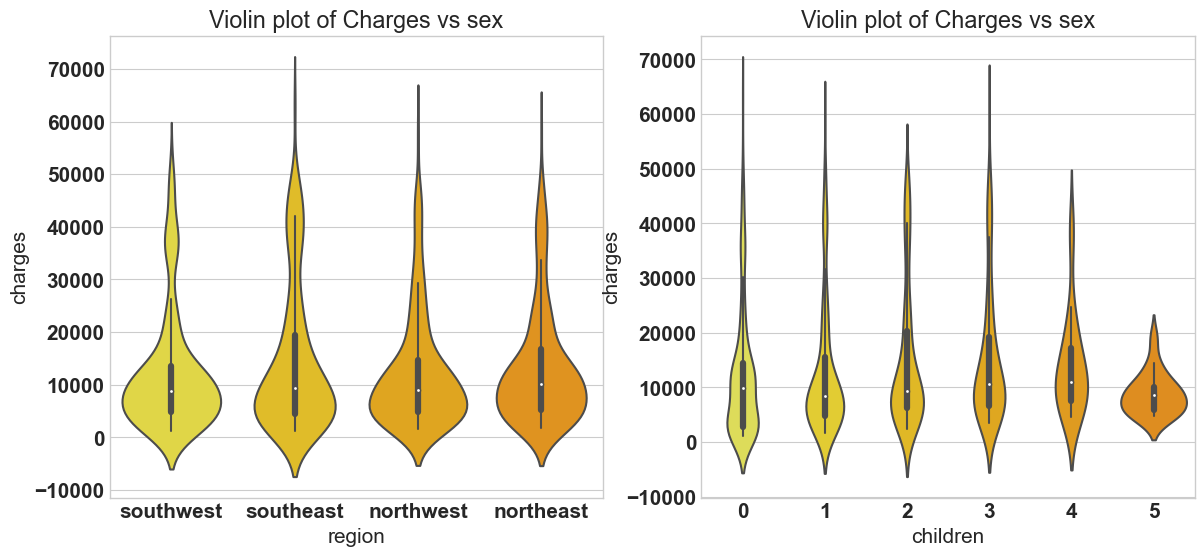

In [439]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(121)
sns.violinplot(x='region', y='charges',data=insurance,palette='Wistia',ax=ax)
ax.set_title('Distribución de la Prima VS Región')

ax = f.add_subplot(122)
sns.violinplot(x='children', y='charges',data=insurance,palette='Wistia',ax=ax)
ax.set_title('Distribución de la Prima VS Hijos')



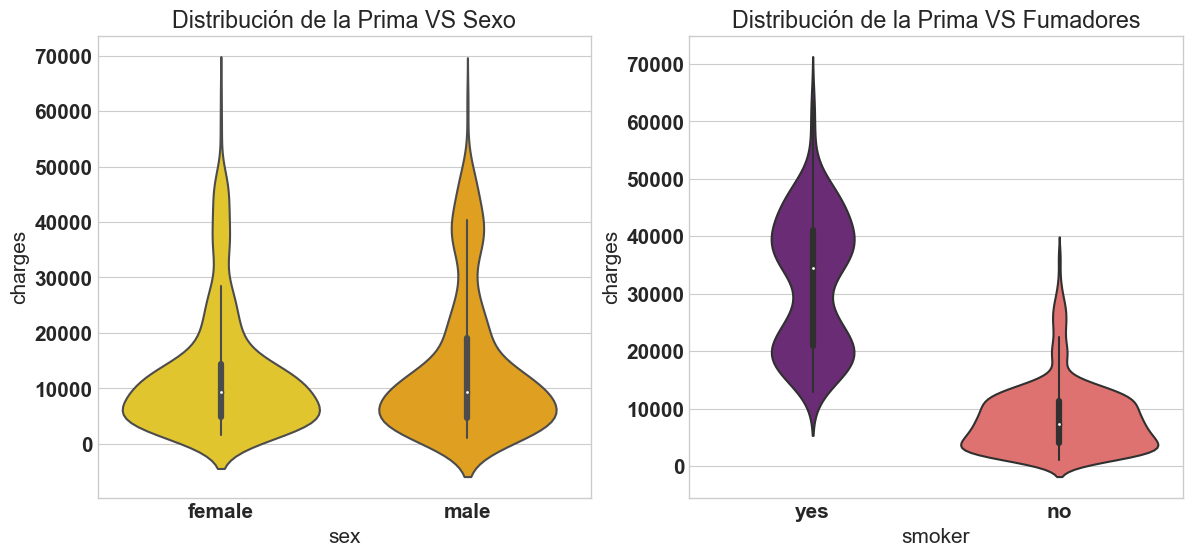

In [443]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=insurance,palette='Wistia',ax=ax)
ax.set_title('Distribución de la Prima VS Sexo')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=insurance,palette='magma',ax=ax)
ax.set_title('Distribución de la Prima VS Fumadores');




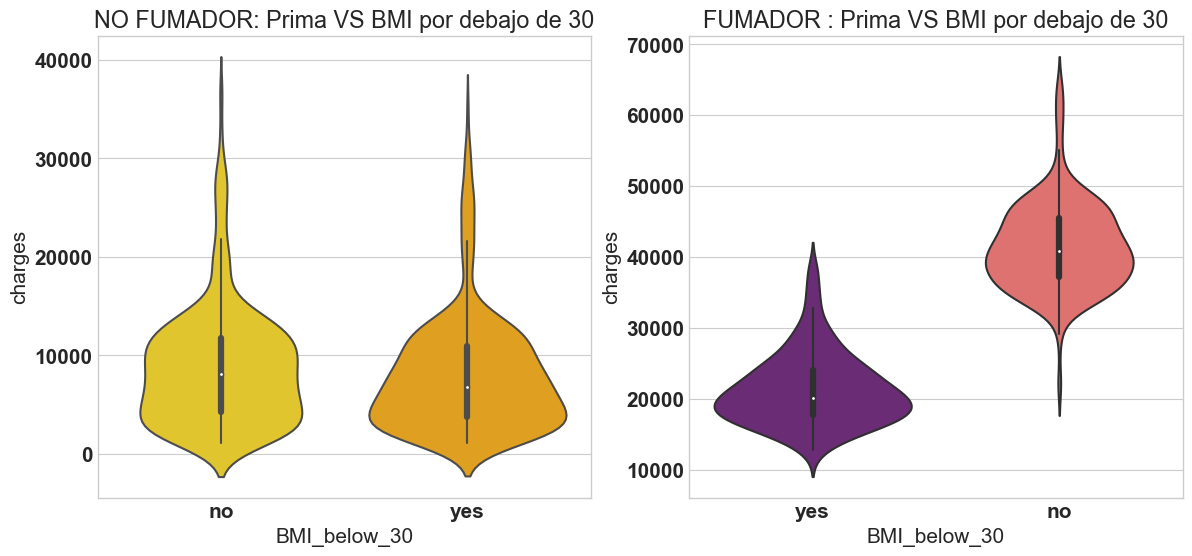

In [446]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.violinplot(x='BMI_below_30', y='charges',data=filter_smoker ,palette='magma',ax=ax)
ax.set_title('FUMADOR : Prima VS BMI por debajo de 30')

ax = f.add_subplot(121)
sns.violinplot(x='BMI_below_30', y='charges',data=filter_no_smoker ,palette='Wistia',ax=ax)
ax.set_title('NO FUMADOR: Prima VS BMI por debajo de 30');

---

---

---



# Seleccionando y entrenando los modelos

In [448]:
insurance.info()
insurance.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   float64
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   charges       1338 non-null   float64
 7   BMI_below_30  1338 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 83.8+ KB


,age,sex,bmi,children,smoker,region,charges,BMI_below_30
0,19.0,female,27.900,0,yes,southwest,16884.92400,yes
1,18.0,male,33.770,1,no,southeast,1725.55230,no
2,28.0,male,33.000,3,no,southeast,4449.46200,no
3,33.0,male,22.705,0,no,northwest,21984.47061,yes
4,32.0,male,28.880,0,no,northwest,3866.85520,yes


In [449]:
insurance_norm.info()
insurance_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   float64
 1   bmi           1338 non-null   float64
 2   children      1338 non-null   int64  
 3   charges       1338 non-null   float64
 4   female        1338 non-null   float64
 5   male          1338 non-null   float64
 6   no smoker     1338 non-null   float64
 7   smoker        1338 non-null   float64
 8   northeast     1338 non-null   float64
 9   northwest     1338 non-null   float64
 10  southeast     1338 non-null   float64
 11  southwest     1338 non-null   float64
 12  BMI_below_30  1338 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 130.8 KB


,age,bmi,children,charges,female,male,no smoker,smoker,northeast,northwest,southeast,southwest,BMI_below_30
0,19.0,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,18.0,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,28.0,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3,33.0,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,32.0,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1


## Usaremos el modelo normalizado "insurance_norm"

## Creamos el Train y Test Set

In [450]:
# plantamos una semilla
np.random.seed(42)




In [451]:


def split_train_test(data, test_ratio):
    test_set_size  =int(len(insurance_norm)*test_ratio)
    shuffle_indices=np.random.permutation(len(data))
    test_indices   =shuffle_indices[:test_set_size]
    train_indices  =shuffle_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    




In [452]:

X_train, X_test = split_train_test(insurance_norm, 0.20)
len(X_train), len(X_test)

(1071, 267)

In [453]:
y_train = X_train["charges"].copy()

X_train = X_train.drop("charges", axis=1)

In [454]:

y_train


846      9872.70100
560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1071, dtype: float64

## Entrenando y evaluando

In [455]:


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)



LinearRegression()

Generamos las prediciones y las comparamos con los valores reales (sólo 10):

In [469]:

some_data = X_train.iloc[:5]
print("Predictions:", lin_reg.predict(some_data))

some_labels = y_train.iloc[:5]
print("Labels:", list(some_labels))



Predictions: [13016.65425518  7619.91834991  8012.68537187  8843.84801953
 11916.85561569]
Labels: [9872.701, 9193.8385, 8534.6718, 27117.99378, 8596.8278]


Error cuadrático medio:
$$ MSE = \frac{1}{n}∑_{i=1}^{n}{(y_i-y_i')}^2 $$

In [474]:


from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse




6031.7519680294

Error absoluto medio:
$$ MAE = \frac{1}{n}∑_{i=1}^{n}{|y_i-y_i'|} $$

In [475]:


from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, predictions)
lin_mae



4245.832766385123

---
---
---
---
---

# EXTRA : Otras regresiones

---

## Árbol de decisión

In [476]:


from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)



DecisionTreeRegressor()

In [477]:

predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse



493.97520812856715

## Mejorando la evaluación por medio de la validación cruzada

In [478]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores


array([6332.96487208, 6937.60087135, 6957.5767229 , 6793.12570225,
       7225.31391736, 6499.54109586, 7466.43193559, 6827.39556082,
       7129.89137572, 5360.66297647])

In [479]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean:   {scores.mean()}")
    print(f"Standard deviation:    {scores.std()}")
    
display_scores(tree_rmse_scores)



Scores: [6332.96487208 6937.60087135 6957.5767229  6793.12570225 7225.31391736
 6499.54109586 7466.43193559 6827.39556082 7129.89137572 5360.66297647]
Mean:   6753.050503039694
Standard deviation:    560.04105629912


In [480]:
scores = cross_val_score(lin_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores



array([6032.2789144 , 6660.16747787, 5081.28797415, 5840.54632493,
       5785.02281756, 5931.01820297, 7173.87553049, 6228.36704542,
       6198.31682186, 5731.88247293])

In [481]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean:   {scores.mean()}")
    print(f"Standard deviation:    {scores.std()}")
    
display_scores(tree_rmse_scores)

Scores: [6332.96487208 6937.60087135 6957.5767229  6793.12570225 7225.31391736
 6499.54109586 7466.43193559 6827.39556082 7129.89137572 5360.66297647]
Mean:   6753.050503039694
Standard deviation:    560.04105629912


**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

In [482]:

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 100, random_state=42)

forest_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [483]:
predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse




1868.7512687394142

In [484]:

forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv= 10)

forest_rmse_scores =  np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


Scores: [4788.01542847 5317.8151682  3829.04182109 4499.20532009 5257.71370287
 5024.26150117 5778.22431894 5448.32617312 5132.18947957 4659.31694659]
Mean:   4973.410986012268
Standard deviation:    526.1165245270511


In [485]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
predictions = svm_reg.predict(X_train)
svm_mse = mean_squared_error(y_train, predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

12790.621958923144

In [486]:


svm_scores = cross_val_score(svm_reg, X_train, y_train, scoring="neg_mean_squared_error", cv= 10)

svm_rmse_scores =  np.sqrt(-forest_scores)
display_scores(svm_rmse_scores)


Scores: [4788.01542847 5317.8151682  3829.04182109 4499.20532009 5257.71370287
 5024.26150117 5778.22431894 5448.32617312 5132.18947957 4659.31694659]
Mean:   4973.410986012268
Standard deviation:    526.1165245270511


## XGBoost

In [487]:
# "xgboost" algoritmo similar a random forest, pero 
# en vez de hacerlo en paralelo, lo hace en serie
# pasando la salida con la entrada del siguiente, 
# puliendo el resultado

import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objetive= "reg:squarederror", random_state=42)

xgb_reg.fit(X_train, y_train)
predictions=xgb_reg.predict(X_train)
xgb_mse=mean_squared_error(y_train, predictions)
xgb_rmse=np.sqrt(xgb_mse)
xgb_mse

c:\Users\ruben\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:58:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




940062.6570899304

In [488]:
xgb_scores = cross_val_score(xgb_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)

c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:59:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:59:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:59:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:59:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:59:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:59:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:59:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:59:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:59:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:59:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Scores: [5456.26936452 5511.33742068 4011.41829707 5184.8786792  5714.86125118
 4988.461667   6256.75637299 5890.82439459 5304.65689

# Evaluando el modelo con el Test Set

In [490]:
y_test = X_test["charges"].copy()
X_test = X_test.drop("charges", axis=1)


In [491]:
predictions = tree_reg.predict(X_test)

final_mse = mean_squared_error(y_test, predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

6967.975538741094